# ***Importing necessary libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# ***Importing dataset***

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
test_copy = test.copy()

In [5]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
test_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
train.info()

# Age should be int
# Gender should be 1 - 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
# Null Value in percentage
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

# ***EDA***

Gender

M    414259
F    135809
Name: Gender, dtype: int64



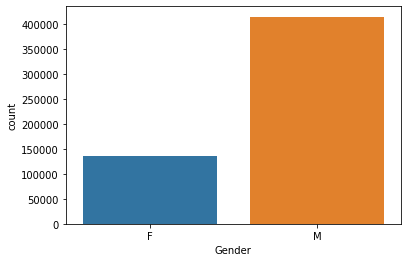

In [10]:
# train
print(train['Gender'].value_counts(),end="\n\n")

sns.countplot(train['Gender'])
plt.show()

M    175772
F     57827
Name: Gender, dtype: int64



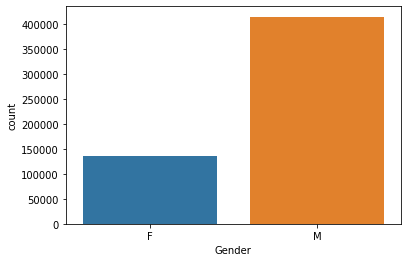

In [11]:
# test
print(test['Gender'].value_counts(),end="\n\n")

sns.countplot(train['Gender'])
plt.show()

Age of Customers

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64



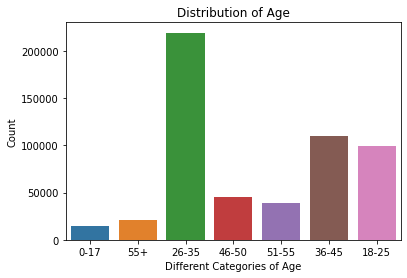

In [12]:
# train
print(train['Age'].value_counts(),end="\n\n")

sns.countplot(train['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.ylabel('Count')
plt.show()

26-35    93428
36-45    46711
18-25    42293
46-50    19577
51-55    16283
55+       9075
0-17      6232
Name: Age, dtype: int64



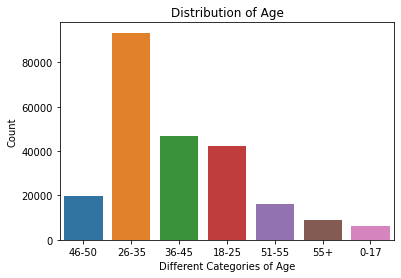

In [13]:
# test
print(test['Age'].value_counts(),end="\n\n")

sns.countplot(test['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.ylabel('Count')
plt.show()

Dependency of age with purchasing power

         Purchase
Age              
0-17    134913183
18-25   913848675
26-35  2031770578
36-45  1026569884
46-50   420843403
51-55   367099644
55+     200767375



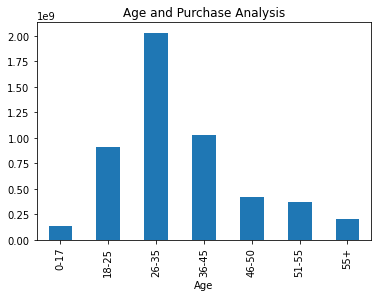

In [14]:
# train
print(train[['Age', 'Purchase']].groupby('Age').sum(),end="\n\n")

train.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Occupation

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64



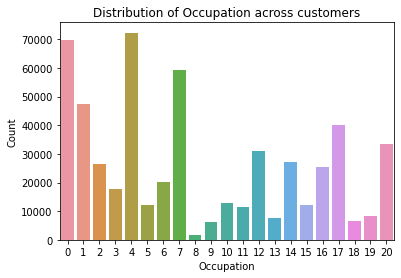

In [15]:
# Train
print(train['Occupation'].value_counts(),end="\n\n")

sns.countplot(train['Occupation'])
plt.title('Distribution of Occupation across customers')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

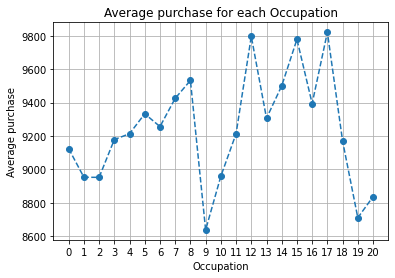

In [16]:
data = train.groupby('Occupation')['Purchase'].mean();
plt.grid();
plt.plot(data.index,data.values,'o--');
plt.xlabel('Occupation');
plt.ylabel('Average purchase');
plt.title('Average purchase for each Occupation');
plt.xticks(data.index);

4     30778
0     29212
7     24994
1     20261
17    17375
20    14278
12    13269
14    11473
2     11408
16    10751
6      8747
3      7476
10     5374
5      5196
15     5191
11     5007
19     3458
13     3325
18     2745
9      2638
8       643
Name: Occupation, dtype: int64



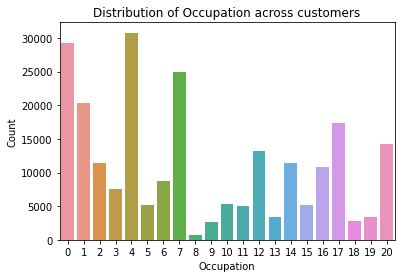

In [17]:
# Test
print(test['Occupation'].value_counts(),end="\n\n")

sns.countplot(test['Occupation'])
plt.title('Distribution of Occupation across customers')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

Cities across customers

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64



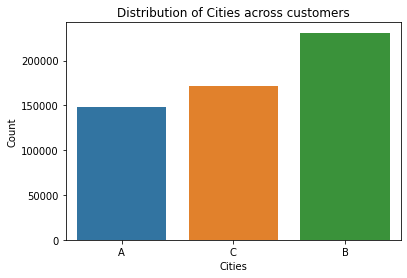

In [18]:
# Train
print(train['City_Category'].value_counts(),end="\n\n")

sns.countplot(train['City_Category'])
plt.title('Distribution of Cities across customers')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

B    98566
C    72509
A    62524
Name: City_Category, dtype: int64



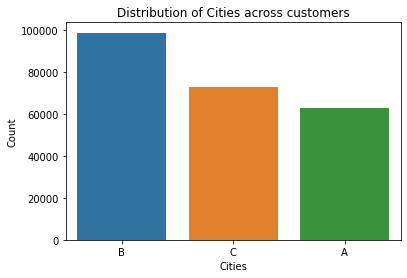

In [19]:
# Test
print(test['City_Category'].value_counts(),end="\n\n")

sns.countplot(test['City_Category'])
plt.title('Distribution of Cities across customers')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

Stay in current city 

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64



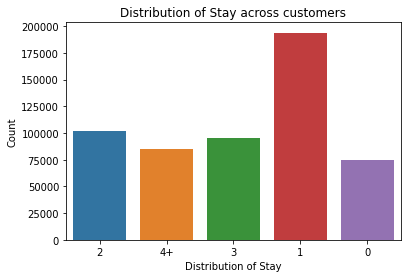

In [20]:
# train
print(train['Stay_In_Current_City_Years'].value_counts(),end="\n\n")

sns.countplot(train['Stay_In_Current_City_Years'])
plt.title('Distribution of Stay across customers')
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

1     82604
2     43589
3     40143
4+    35945
0     31318
Name: Stay_In_Current_City_Years, dtype: int64



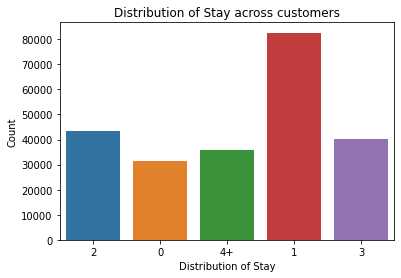

In [21]:
# test
print(test['Stay_In_Current_City_Years'].value_counts(),end="\n\n")

sns.countplot(test['Stay_In_Current_City_Years'])
plt.title('Distribution of Stay across customers')
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

Marital_Status

0    324731
1    225337
Name: Marital_Status, dtype: int64



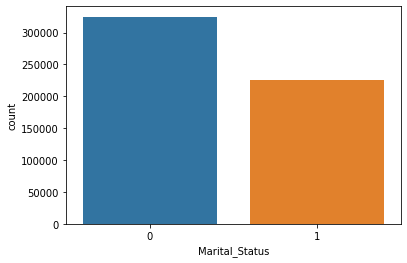

In [22]:
# train
print(train['Marital_Status'].value_counts(),end="\n\n")

sns.countplot(train['Marital_Status'])
plt.show()

0    137807
1     95792
Name: Marital_Status, dtype: int64



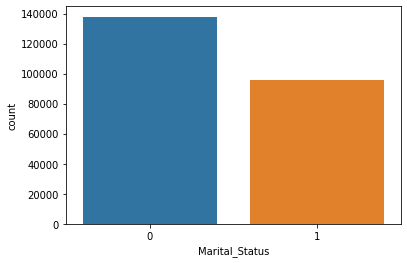

In [23]:
# test
print(test['Marital_Status'].value_counts(),end="\n\n")

sns.countplot(test['Marital_Status'])
plt.show()

# ***Dropping unnecessary columns***

In [24]:
train = train.drop(['User_ID', 'Product_ID'], axis = 1)
test = test.drop(['User_ID', 'Product_ID'], axis = 1)


# ***Filling null values***

In [25]:
train['Product_Category_2'].fillna(0, inplace = True)
test['Product_Category_2'].fillna(0, inplace = True)

train['Product_Category_3'].fillna(0, inplace = True)
test['Product_Category_3'].fillna(0, inplace = True)

# ***Feature Encoding***

In [26]:
# Stay_In_Current_City_Years
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map({'0': 0,
                                                                               '1': 1,
                                                                                '2': 2,
                                                                                '3': 3,
                                                                                '4+': 4})
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map({'0': 0,
                                                                               '1': 1,
                                                                                '2': 2,
                                                                                '3': 3,
                                                                                '4+': 4})

In [27]:
# age 
train['Age'] = train['Age'].map({'0-17': 17,
                               '18-25': 25,
                               '26-35': 35,
                               '36-45': 45,
                               '46-50': 50,
                               '51-55': 55,
                               '55+': 60})

test['Age'] = test['Age'].map({'0-17': 17,
                               '18-25': 25,
                               '26-35': 35,
                               '36-45': 45,
                               '46-50': 50,
                               '51-55': 55,
                               '55+': 60})

In [28]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

Encoding categorical data
* Gender
* City_Category

In [29]:
train['Gender'] = lr.fit_transform(train['Gender'])
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,17,10,A,2,0,3,0.0,0.0,8370
1,0,17,10,A,2,0,1,6.0,14.0,15200
2,0,17,10,A,2,0,12,0.0,0.0,1422
3,0,17,10,A,2,0,12,14.0,0.0,1057
4,1,60,16,C,4,0,8,0.0,0.0,7969


In [30]:

test['Gender'] = lr.fit_transform(test['Gender'])
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,50,7,B,2,1,1,11.0,0.0
1,1,35,17,C,0,0,3,5.0,0.0
2,0,45,1,B,4,1,5,14.0,0.0
3,0,45,1,B,4,1,4,9.0,0.0
4,0,35,1,C,1,0,4,5.0,12.0


In [31]:
train['City_Category'] = lr.fit_transform(train['City_Category'])
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,17,10,0,2,0,3,0.0,0.0,8370
1,0,17,10,0,2,0,1,6.0,14.0,15200
2,0,17,10,0,2,0,12,0.0,0.0,1422
3,0,17,10,0,2,0,12,14.0,0.0,1057
4,1,60,16,2,4,0,8,0.0,0.0,7969


In [32]:
test['City_Category'] = lr.fit_transform(test['City_Category'])
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,50,7,1,2,1,1,11.0,0.0
1,1,35,17,2,0,0,3,5.0,0.0
2,0,45,1,1,4,1,5,14.0,0.0
3,0,45,1,1,4,1,4,9.0,0.0
4,0,35,1,2,1,0,4,5.0,12.0


Scaling numerical data
* Age
* Occupation 
* Stay_In_Current_City_Years
* Product_Category_1
* Product_Category_2 
* Product_Category_3

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [34]:
# Age
train["Age"] = sc.fit_transform(train["Age"].values.reshape(-1, 1))
test["Age"] = sc.transform(test["Age"].values.reshape(-1, 1))

In [35]:
# Occupation
train["Occupation"] = sc.fit_transform(train["Occupation"].values.reshape(-1, 1))
test["Occupation"] = sc.transform(test["Occupation"].values.reshape(-1, 1))

In [36]:
# Product_Category_1
train["Product_Category_1"] = sc.fit_transform(train["Product_Category_1"].values.reshape(-1, 1))
test["Product_Category_1"] = sc.transform(test["Product_Category_1"].values.reshape(-1, 1))

In [37]:
# Product_Category_2
train["Product_Category_2"] = sc.fit_transform(train["Product_Category_2"].values.reshape(-1, 1))
test["Product_Category_2"] = sc.transform(test["Product_Category_2"].values.reshape(-1, 1))

In [38]:
# Product_Category_3
train["Product_Category_3"] = sc.fit_transform(train["Product_Category_3"].values.reshape(-1, 1))
test["Product_Category_3"] = sc.transform(test["Product_Category_3"].values.reshape(-1, 1))

In [39]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-2.059570,0.294864,0,2,0,-0.610809,-1.083654,-0.614641,8370
1,0,-2.059570,0.294864,0,2,0,-1.118912,-0.118323,1.625106,15200
2,0,-2.059570,0.294864,0,2,0,1.675656,-1.083654,-0.614641,1422
3,0,-2.059570,0.294864,0,2,0,1.675656,1.168785,-0.614641,1057
4,1,2.094842,1.214734,2,4,0,0.659449,-1.083654,-0.614641,7969


# ***Spliting data***

In [40]:

y_train = train['Purchase']
train = train.drop(['Purchase'], axis = 1)
x_train = train

# checking the shapes of x and y
print("Shape of x: ", x_train.shape)
print("Shape of y: ", y_train.shape)

Shape of x:  (550068, 9)
Shape of y:  (550068,)


In [41]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
                                                    x_train,
                                                    y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 15
                                                  )

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_val.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_val.shape)

Shape of x_train:  (440054, 9)
Shape of x_test:  (110014, 9)
Shape of y_train:  (440054,)
Shape of y_test:  (110014,)


# ***Heatmap of features***

<AxesSubplot:title={'center':'Correlation of Features'}>

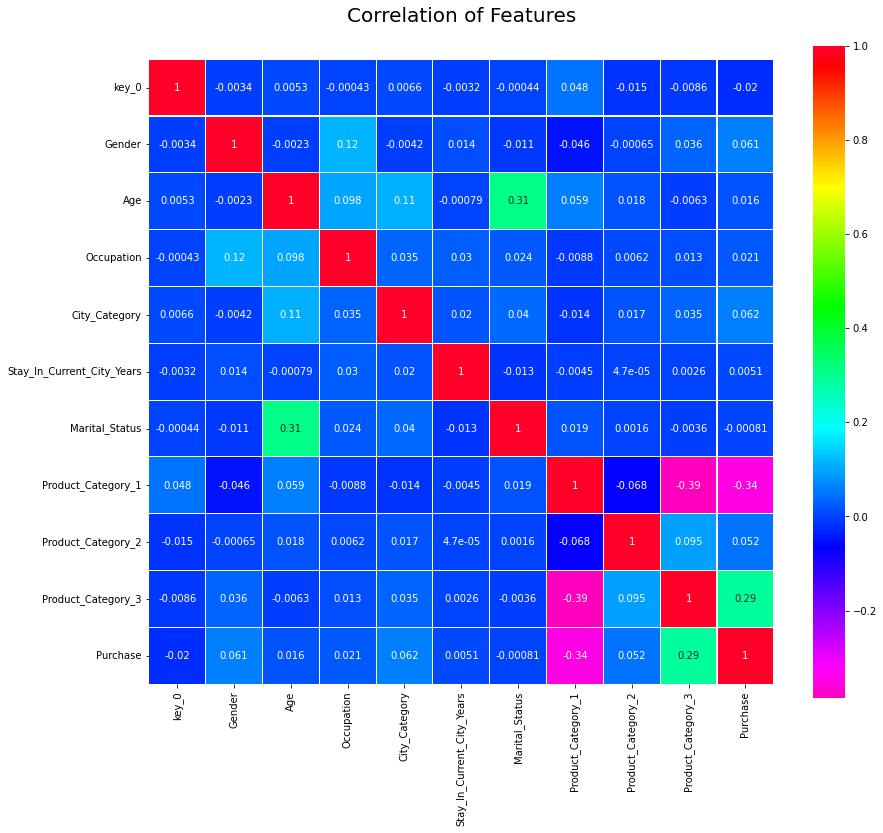

In [42]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

# ***Modelling***

In [43]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
# Linear Regression
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_val)

# RMSE error
mse = mean_squared_error(y_val, y_pred)
print("RMSE Error:", np.sqrt(mse))

# R2 Score
r2 = r2_score(y_val, y_pred)
print("R2 Score:", r2)

MSE_Score.append(mse)
R2_Score.append(r2)

RMSE Error: 4637.307363646357
R2 Score: 0.15057738501049112


In [46]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_val)

# RMSE error
mse = mean_squared_error(y_val, y_pred)
print("RMSE Error:", np.sqrt(mse))

# R2 Score
r2 = r2_score(y_val, y_pred)
print("R2 Score:", r2)

MSE_Score.append(mse)
R2_Score.append(r2)

RMSE Error: 3331.642183684092
R2 Score: 0.5615614228456947


In [47]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_val)

# RMSE error
mse = mean_squared_error(y_val, y_pred)
print("RMSE Error:", np.sqrt(mse))

# R2 Score
r2 = r2_score(y_val, y_pred)
print("R2 Score:", r2)

MSE_Score.append(mse)
R2_Score.append(r2)

RMSE Error: 3046.464510460722
R2 Score: 0.6334068872399008


In [48]:
# XGB Regressor
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_val)

# RMSE error
mse = mean_squared_error(y_val, y_pred)
print("RMSE Error:", np.sqrt(mse))

# R2 Score
r2 = r2_score(y_val, y_pred)
print("R2 Score:", r2)

MSE_Score.append(mse)
R2_Score.append(r2)

RMSE Error: 2866.8084960405827
R2 Score: 0.6753694251027862


In [49]:
training = pd.DataFrame(list(zip(Algorithm,MSE_Score,R2_Score)),columns =["Algorithm", "MSE_Score", "R2_Score"])
training.head()

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.150462e+07,0.150577
1,DecisionTreeRegressor,1.109984e+07,0.561561
2,RandomForestRegressor,9.280946e+06,0.633407
3,XGB Regressor,8.218591e+06,0.675369


# ***Making the final Regression model based on the performance***
Here in ths case ***XGB Regressor***

In [50]:
regressorfinal = xgb.XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
regressorfinal.fit(x_train, y_train)

y_pred = regressorfinal.predict(x_val)

# RMSE error
mse = mean_squared_error(y_val, y_pred)
print("RMSE Error              :", np.sqrt(mse))

# R2 Score
r2 = r2_score(y_val, y_pred)
print("R2 Score                :", r2)

# Accuracy for validation
print("Accuracy for train      :",round(regressorfinal.score(x_train,y_train)*100,2),"%")

# Accuracy for validation
print("Accuracy for validation :",round(regressorfinal.score(x_val,y_val)*100,2),"%")

RMSE Error              : 2872.1424952206435
R2 Score                : 0.674160282521072
Accuracy for train      : 68.79 %
Accuracy for validation : 67.42 %


# ***Making the prediction on the test set***
using our trained ***XGB Regressor*** model

In [52]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,1.128700,-0.165072,1,2,1,-1.118912,0.686119,-0.614641
1,1,-0.320514,1.368046,2,0,0,-0.610809,-0.279212,-0.614641
2,0,0.645628,-1.084943,1,4,1,-0.102705,1.168785,-0.614641
3,0,0.645628,-1.084943,1,4,1,-0.356757,0.364342,-0.614641
4,0,-0.320514,-1.084943,2,1,0,-0.356757,-0.279212,1.305142


In [53]:
test.shape

(233599, 9)

In [54]:
test_copy.shape

(233599, 11)

In [55]:
y_test_pred = regressorfinal.predict(test)
y_test_pred = pd.Series(y_test_pred)

In [56]:
test_copy["Purchase"] = y_test_pred.astype('int')

In [57]:
test_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,14880
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,11005
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,6596
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2814
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2837


In [58]:
test_copy.to_csv("Final_test_Prediction.csv",index=False)

In [59]:
data = pd.read_csv("Final_test_Prediction.csv")

In [60]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,14880
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,11005
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,6596
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2814
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2837
